In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Datamining_project"

/content/drive/MyDrive/Datamining_project


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dataset=pd.read_csv('/content/drive/MyDrive/Datamining_project/df_imputed.csv')

In [ ]:
dataset.shape

(11115, 10)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve

In [10]:
X = dataset.drop(columns=['Potability'])  # Features
y = dataset['Potability']  # Target variable

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Metrics:
Accuracy: 0.6122
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Log Loss: 0.6647


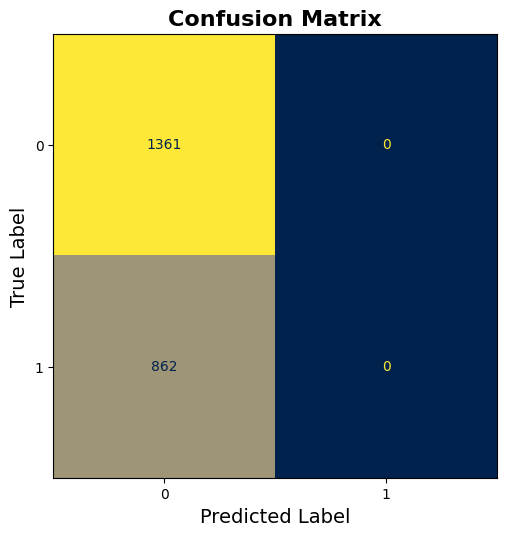

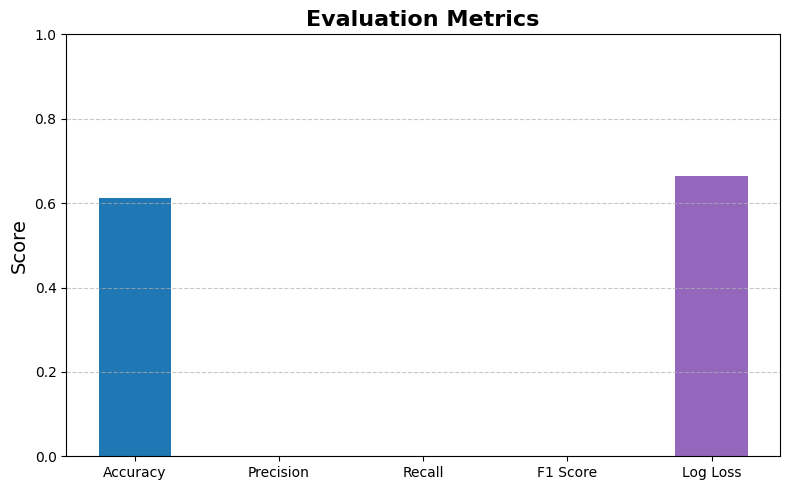

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

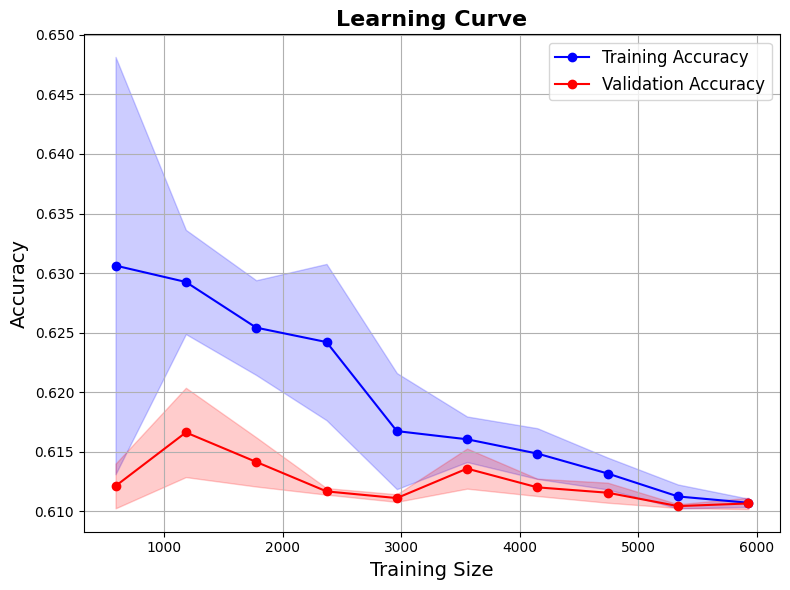

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    log_loss,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val) if hasattr(model, "predict_proba") else None

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba) if y_val_proba is not None else None

# Print metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}" if log_loss_val else "Log Loss: N/A")
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Define class labels
class_labels = ['Non-Potable (0)', 'Potable (1)']

# Display the confusion matrix with annotations
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot(cmap="cividis", colorbar=False, ax=ax)

# Add title and labels
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)



plt.tight_layout(pad=3.0)
plt.show()
# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val if log_loss_val is not None else 0  # Set Log Loss to 0 if None
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width,
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# No value labels on top of the bars now
# Removed the part where we add the text labels on top of bars

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()





Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'C': 0.0006951927961775605, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Metrics:
Accuracy: 0.5313
Precision: 0.4171
Recall: 0.5255
F1 Score: 0.4651
Log Loss: 0.6911


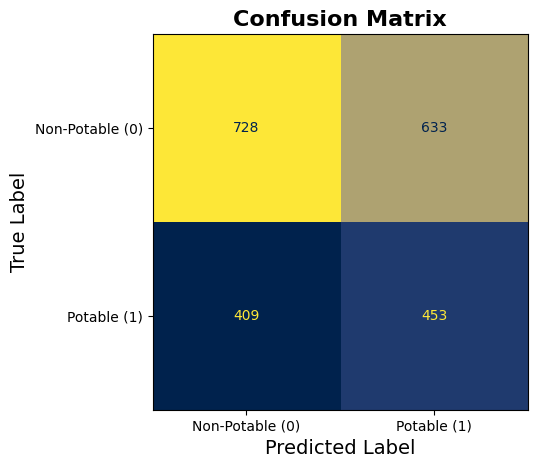

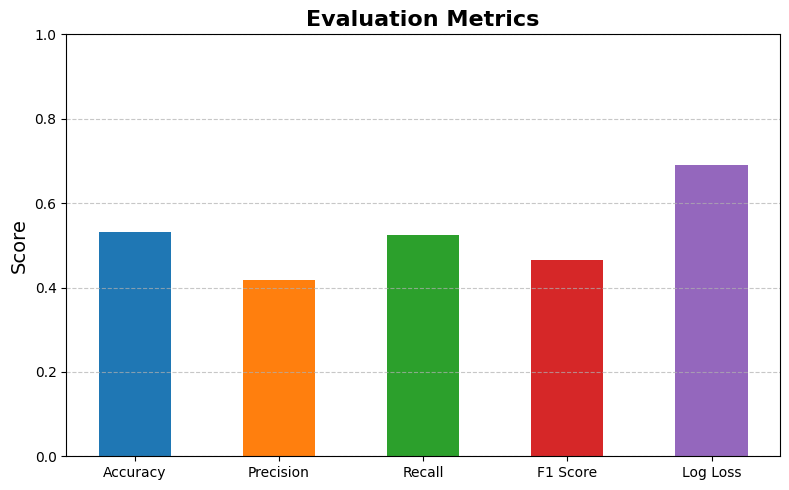

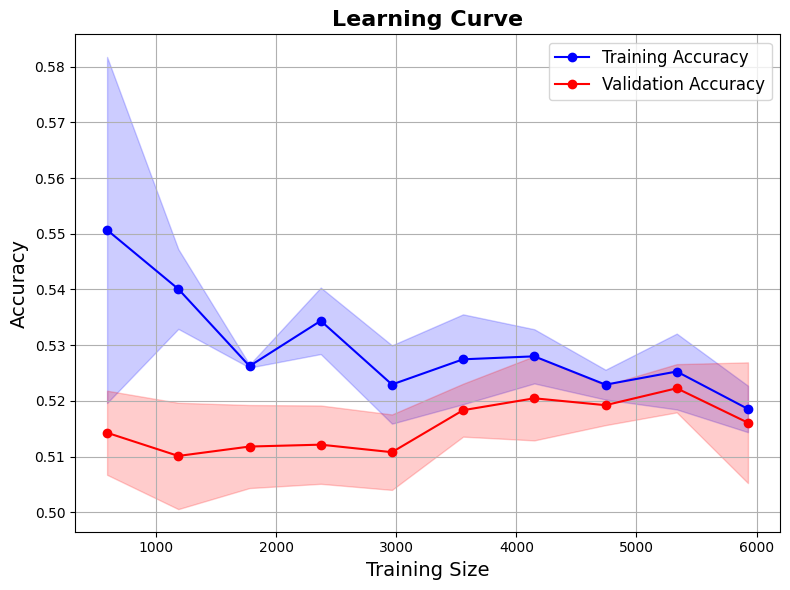

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt


# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Handle class imbalance using class_weight='balanced'
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': np.logspace(-4, 4, 20),        # Regularization strength
    'penalty': ['l2'],                  # L2 regularization (commonly used)
    'solver': ['liblinear', 'saga'],    # Optimization solvers
    'max_iter': [200, 500, 1000]        # Maximum number of iterations
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled) if hasattr(best_model, "predict_proba") else None

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba) if y_val_proba is not None else None

# Print metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}" if log_loss_val else "Log Loss: N/A")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Define class labels
class_labels = ['Non-Potable (0)', 'Potable (1)']

# Display the confusion matrix with annotations
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot(cmap="cividis", colorbar=False, ax=ax)

# Add title and labels
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)



plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val if log_loss_val is not None else 0  # Set Log Loss to 0 if None
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width,
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'C': 0.0006951927961775605, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Metrics:
Accuracy: 0.5313
Precision: 0.4171
Recall: 0.5255
F1 Score: 0.4651
Log Loss: 0.6911


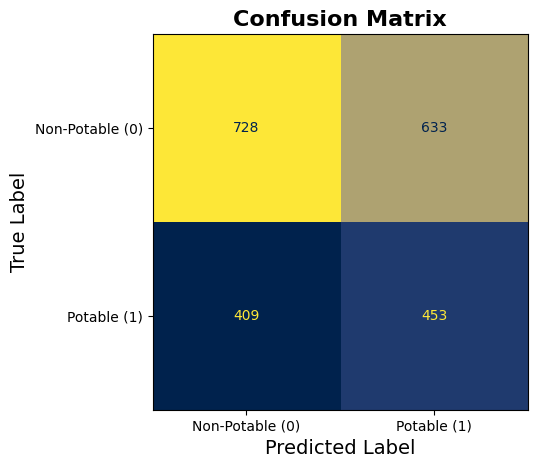

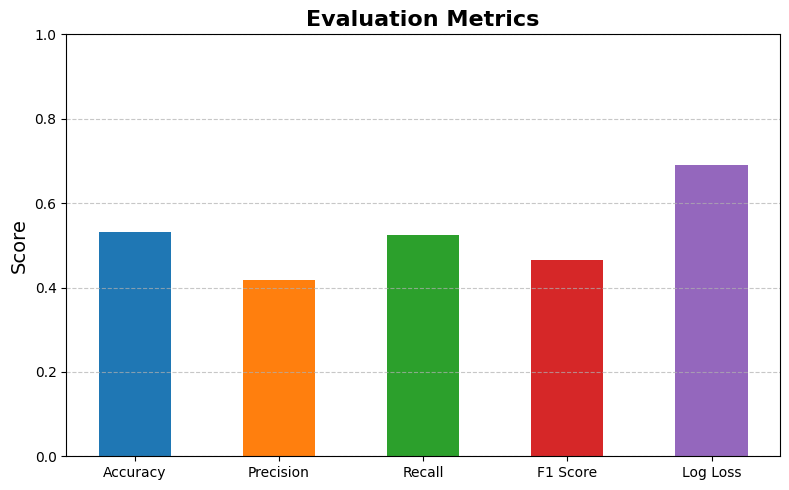

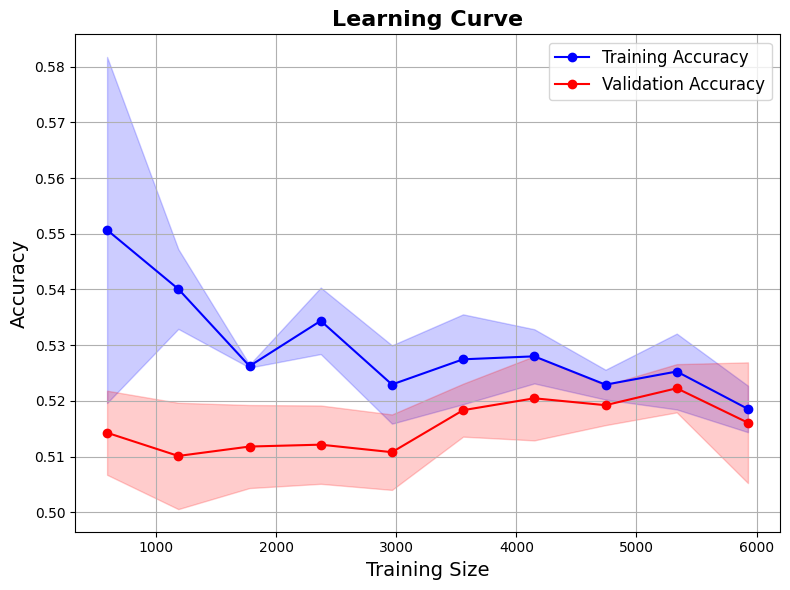

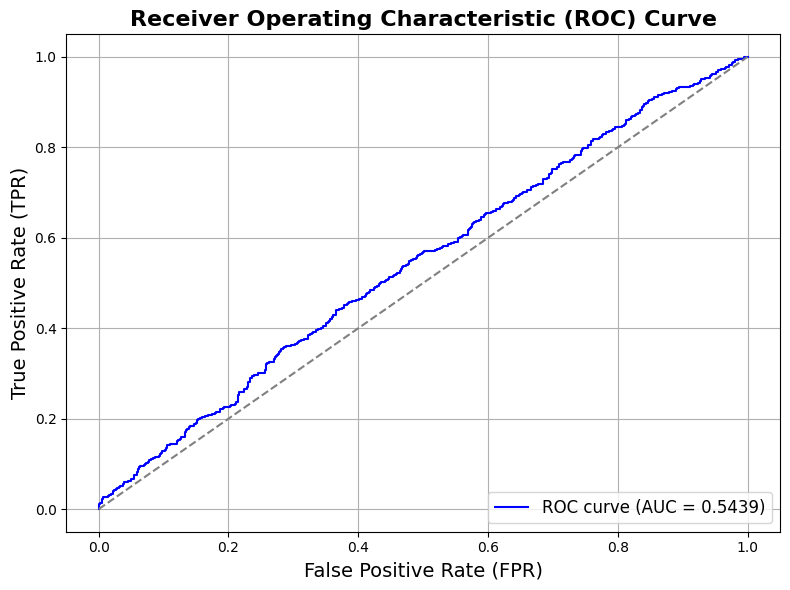

In [14]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Split the dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Handle class imbalance using class_weight='balanced'
log_reg = LogisticRegression(random_state=42, class_weight='balanced')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': np.logspace(-4, 4, 20),        # Regularization strength
    'penalty': ['l2'],                  # L2 regularization (commonly used)
    'solver': ['liblinear', 'saga'],    # Optimization solvers
    'max_iter': [200, 500, 1000]        # Maximum number of iterations
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba)

# Print metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}")
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))

# Define class labels
class_labels = ['Non-Potable (0)', 'Potable (1)']

# Display the confusion matrix with annotations
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot(cmap="cividis", colorbar=False, ax=ax)

# Add title and labels
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)



plt.tight_layout(pad=3.0)
plt.show()

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val
}

# Bar Plot of Evaluation Metrics
fig, ax = plt.subplots(figsize=(8, 5))

# Bar properties
bar_width = 0.5  # Increase bar width slightly to reduce spacing
bar_positions = np.arange(len(metrics))  # Ensure bars are closely packed

# Create the bar plot
bars = ax.bar(bar_positions, metrics.values(), width=bar_width,
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Update the x-axis ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

# Add titles and labels
ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)  # Adjust the range based on the metrics
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize layout
plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for train/validation scores
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the trained model
joblib.dump(best_model, 'logistic_regression_model.pkl')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random classifier line
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16, fontweight="bold")
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best Logistic Regression Hyperparameters: {'C': 0.03359818286283781, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
Validation Metrics:
Accuracy: 0.6122
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Log Loss: 0.6647


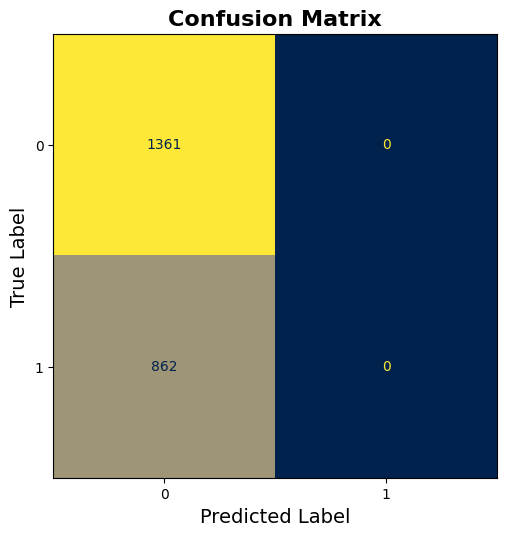

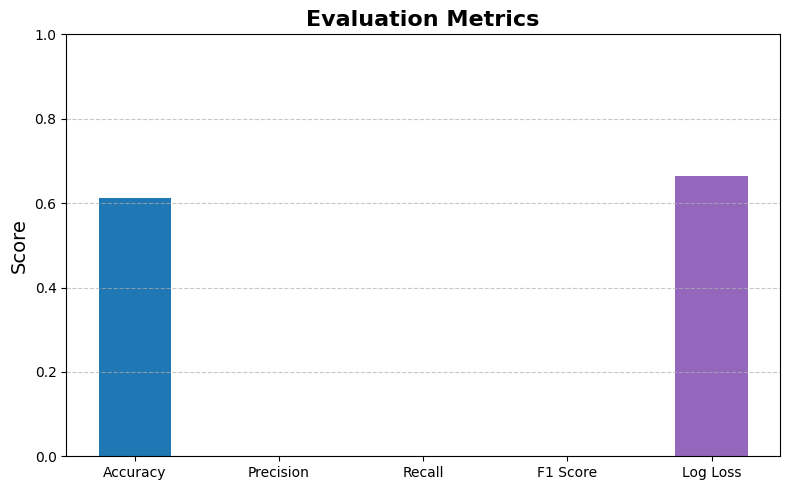

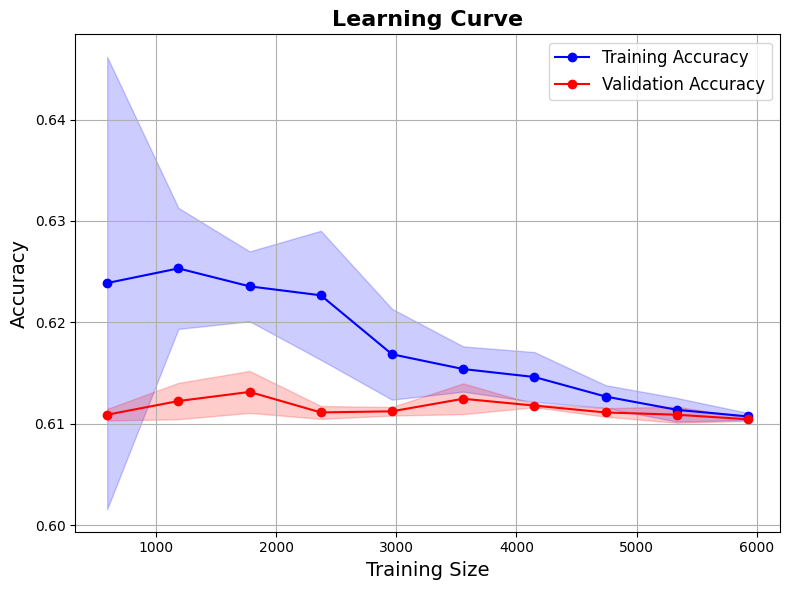

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'C': np.logspace(-4, 4, 20),               # Regularization strength
    'penalty': ['l2'],                         # L2 regularization
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],  # Solvers
    'max_iter': [100, 200, 500],               # Maximum number of iterations
    'tol': [1e-4, 1e-3, 1e-2],                 # Tolerance for stopping criteria
    'class_weight': [None, 'balanced']         # Handling class imbalance
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Logistic Regression Hyperparameters:", best_params)

# Make predictions using the best model
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled) if hasattr(best_model, "predict_proba") else None

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba) if y_val_proba is not None else None

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}" if log_loss_val else "Log Loss: N/A")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_val))
disp.plot(cmap="cividis", colorbar=False, ax=ax)
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.tight_layout(pad=3.0)
plt.show()

# Bar Plot of Evaluation Metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val if log_loss_val is not None else 0  # Set Log Loss to 0 if None
}

fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.5
bar_positions = np.arange(len(metrics))

bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best Logistic Regression Hyperparameters: {'C': 0.03359818286283781, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
Model saved successfully!
Validation Metrics:
Accuracy: 0.6122
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Log Loss: 0.6647


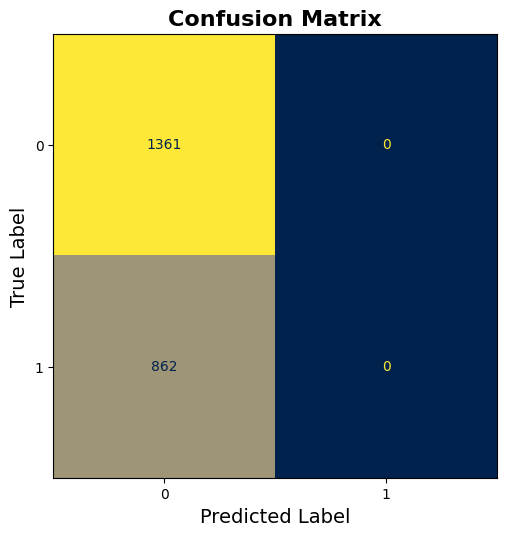

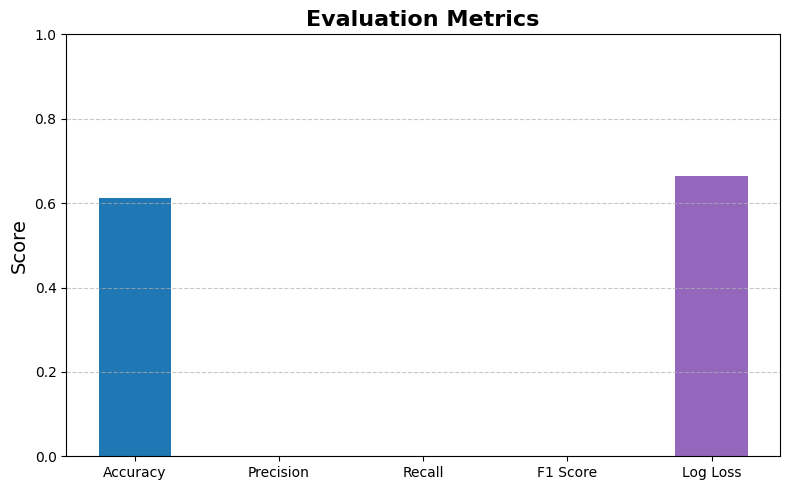

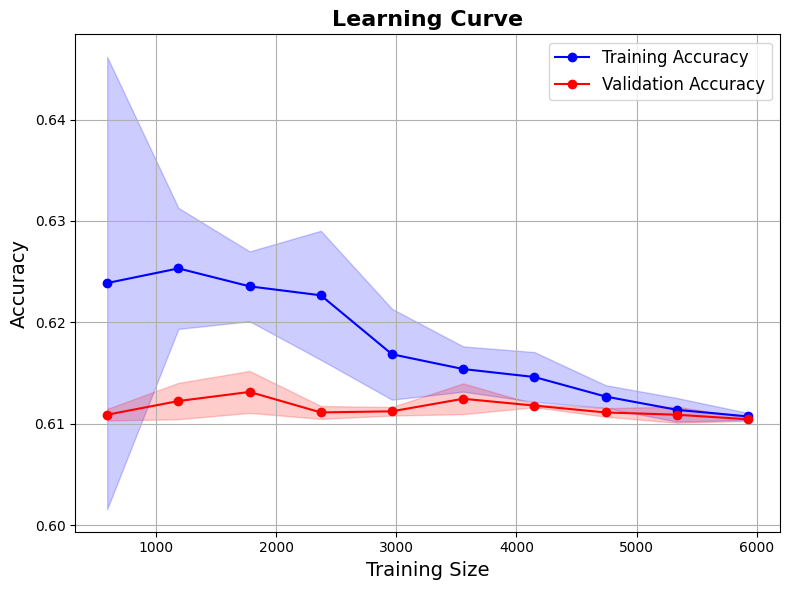

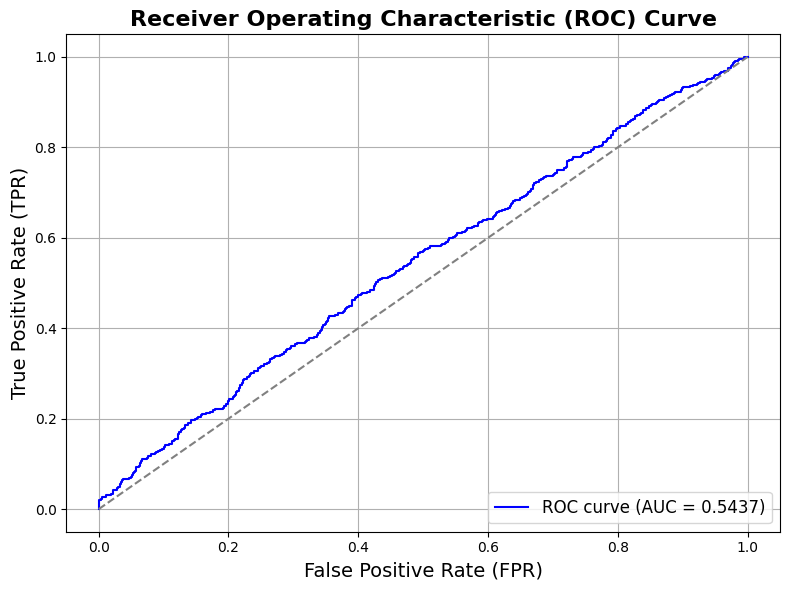

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For saving the model

# Assuming you have your data loaded as X and y

# Split the dataset into train, validation, and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)

# Hyperparameter grid for GridSearch
param_grid = {
    'C': np.logspace(-4, 4, 20),               # Regularization strength
    'penalty': ['l2'],                         # L2 regularization
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],  # Solvers
    'max_iter': [100, 200, 500],               # Maximum number of iterations
    'tol': [1e-4, 1e-3, 1e-2],                 # Tolerance for stopping criteria
    'class_weight': [None, 'balanced']         # Handling class imbalance
}

# Perform GridSearch with cross-validation
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Logistic Regression Hyperparameters:", best_params)

# Save the best model to a file
joblib.dump(best_model, 'logistic_regression_model.pkl')  # Save the trained model
print("Model saved successfully!")

# Make predictions using the best model
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled) if hasattr(best_model, "predict_proba") else None

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, zero_division=0)
recall = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)
log_loss_val = log_loss(y_val, y_val_proba) if y_val_proba is not None else None

# Print the validation metrics
print("Validation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_val:.4f}" if log_loss_val else "Log Loss: N/A")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_val))
disp.plot(cmap="cividis", colorbar=False, ax=ax)
ax.set_title("Confusion Matrix", fontsize=16, fontweight="bold")
ax.set_xlabel("Predicted Label", fontsize=14)
ax.set_ylabel("True Label", fontsize=14)
plt.tight_layout(pad=3.0)
plt.show()

# Bar Plot of Evaluation Metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Log Loss": log_loss_val if log_loss_val is not None else 0  # Set Log Loss to 0 if None
}

fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.5
bar_positions = np.arange(len(metrics))

bars = ax.bar(bar_positions, metrics.values(), width=bar_width, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics.keys())

ax.set_title("Evaluation Metrics", fontsize=16, fontweight="bold")
ax.set_ylabel("Score", fontsize=14)
ax.set_ylim(0, 1)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Learning Curve (Training and Validation Accuracy vs Dataset Size)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red", marker="o")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="red", alpha=0.2)
plt.title("Learning Curve", fontsize=16, fontweight="bold")
plt.xlabel("Training Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba[:, 1])  # Assuming binary classification (y_val_proba[:, 1] is for the positive class)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16, fontweight="bold")
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
